In [1]:
#!pip install gender_guesser

In [2]:
#!pip install arxiv

math.AG  :  Algebraic Geometry
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 111, 'mujeres': 19, 'nombre androgino': 12, 'desconocido': 51}
Listo el pollo para la categoría Algebraic Geometry
math.AT  :  Algebraic Topology
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 78, 'mujeres': 3, 'nombre androgino': 4, 'desconocido': 9}
{'varones': 198, 'mujeres': 27, 'nombre androgino': 16, 'desconocido': 43}
{'varones': 264, 'mujeres': 39, 'nombre androgino': 20, 'desconocido': 60}
Listo el pollo para la categoría Algebraic Topology
math.AP  :  Analysis of PDEs
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 49, 'mujeres': 10, 'nombre androgino': 10, 'desconocido': 30}
{'varones': 99, 'mujeres': 22, 'nombre androgino': 16, 'desconocido': 60}
{'varones': 147, 'mujeres': 35, 'nombre androgino': 26, 'desconocido': 88}
{'varones': 191, 'mujeres': 51, 'nombre androgino': 30, 'desconocido': 120}


Listo el pollo para la categoría Rings and Algebras
math.SP  :  Spectral Theory
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 64, 'mujeres': 13, 'nombre androgino': 5, 'desconocido': 16}
{'varones': 176, 'mujeres': 24, 'nombre androgino': 14, 'desconocido': 75}
Listo el pollo para la categoría Spectral Theory
math.ST  :  Statistics Theory
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 59, 'mujeres': 6, 'nombre androgino': 4, 'desconocido': 27}
{'varones': 110, 'mujeres': 17, 'nombre androgino': 10, 'desconocido': 53}
{'varones': 213, 'mujeres': 30, 'nombre androgino': 28, 'desconocido': 117}
{'varones': 256, 'mujeres': 42, 'nombre androgino': 43, 'desconocido': 144}
Listo el pollo para la categoría Statistics Theory
math.SG  :  Symplectic Geometry
{'varones': 0, 'mujeres': 0, 'nombre androgino': 0, 'desconocido': 0}
{'varones': 58, 'mujeres': 10, 'nombre androgino': 6, 'desconocido': 25}
{'varones': 118, 'mujeres': 

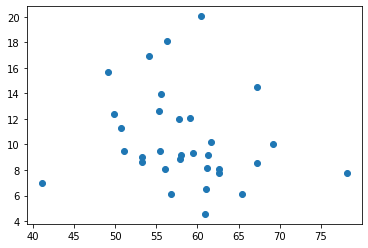

<AxesSubplot:>

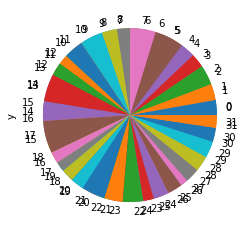

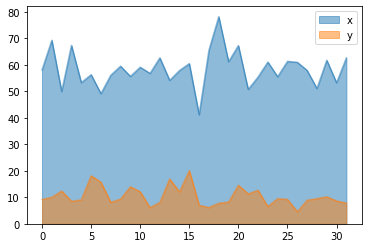

In [1]:
########## PRIMERA PARTE: Obtenemos las categorías de arxiv, y guardamos en un diccionario las abreviaturas y
##########                sus respectivos significados.

## Scraper para extraer las categorias de arxiv para los artículos de matemática

import bs4 as soup
import requests

## La url que nos interesa es la siguiente:
url = 'https://arxiv.org/archive/math'

## Obtenemos el codigo html del link
info = requests.get(url) 
data = soup.BeautifulSoup(info.text, 'lxml')

## Mediante inspección del buscador observamos que las categorías se encuentran en negrita,
## lo cual en html está indicado por <b>. Utilizamos esta observación para armar una lista "categorias"

categorias = []

for i in data.findAll('b'):
    categorias.append(i.text)

## Inspeccionamos el contenido de la lista y dado que las primeras cuatro líneas no nos interesan las quitamos,
## luego además, puesto que cada categoría está dada con su abreviatura y su nombre completo
## (por ejemplo 'math.AG - Algebraic Geometry'), separamos la cadena aprovechando el guión " - "
    
parsedCategorias = categorias[4:]

for i in range(len(parsedCategorias)):
    s = parsedCategorias[i].split(" - ")
    parsedCategorias[i] = s

## Finalmente, transformamos la lista en diccionario para utilizarlo luego.

DicParsedCategorias = dict(parsedCategorias)


########### SEGUNDA PARTE: Armamos el detector de género de acuerdo al nombre. Para esto usamos el módulo
###########                gender_guesser cuya documentación se encuentra en 
###########                https://test.pypi.org/project/gender-guesser/#description


import gender_guesser.detector as gender       # Importamos el módulo.

detectar = gender.Detector()

## Armamos el diccionario para guardar los valores del recuento

recuento_en_cero = {"varones": 0, "mujeres": 0, "nombre androgino": 0, "desconocido": 0}

## Definimos la función que nos servirá para chequear el género del autor y guardar en el diccionario el resultado

def check_gender(recuento, autor):
    nombre = autor.split(' ')[0]               # Del nombre completo obtengo el primer nombre
    genero = detectar.get_gender(nombre)       # Llamo al detector de género
    if genero == 'male':                       # Bucle para llevar el recuento en el diccionario
        recuento['varones'] += 1
    elif genero == 'female':
        recuento['mujeres'] += 1
    elif genero == 'andy':
        recuento['nombre androgino'] += 1
    elif genero == 'unknown':
        recuento['desconocido'] += 1
    return recuento

########### TERCERA PARTE: Exploramos los artículos que nos interesan en arxiv.org. Para esto usamos el modulo
###########                arxiv, cuya documentación de arxiv se encuentra en
###########                https://github.com/lukasschwab/arxiv.py/blob/master/README.md
###########                Esta parte es más compleja, pues debemos hacer una exploración y un recuento
###########                por cada categoría. Lo resolvemos con un bucle, guardando todo en una tabla.

import arxiv                # Importamos el módulo de arxiv
import pandas as pd         # Para armarnos la tabla

## Armamos la tabla. Queremos que tenga por índices de filas las categorías de arxiv,
## y que en las columnas tenga el recuento por género. Para esto armaremos una lista de listas vacías,
## del tamaño acorde a las longitudes de los diccionarios.

filas = len(list(DicParsedCategorias.keys()))
Tabla = pd.DataFrame(index=range(filas),columns=list(recuento_en_cero.keys()))

## Agrego un contador opcional: Lo armé para ver que corra el script de búsqueda, para bajar la ansiedad de la
## espera, pues la base de datos de arxiv es muy grande y lleva tiempo explorarla (en la documentación se indica
## una estimación del tiempo necesario). También bajamos el tiempo requiriendo una cantidad fija de resultados
## en la búsqueda. Dejo comentada la versión larga.

## Armamos el bucle de exploración, que va a recorrer las categorías guardadas en la lista parsedCategorias

for i in range(filas):
    cadena = parsedCategorias[i][0]         # Recuperamos la abreviación de la categoría
    cadena_larga = parsedCategorias[i][1]   # Recuperamos el nombre completo de la categoría
    print(cadena, " : ", cadena_larga)      # Nos ubica en qué categoría está explorando
    
    ## Hacemos la búsqueda con el módulo arxiv y sus funcionalidades.
    ## En esta alternativa le agregamos a la exploración una cantidad máxima de resultados posibles, y
    ## que los tome de acuerdo a la fecha de envío.
    
    contador = 0     # Inicializamos el contador opcional.
    
    recuento = {"varones": 0, "mujeres": 0, "nombre androgino": 0, "desconocido": 0}     # Inicializamos el diccionario para el recuento
    
    exploracion = arxiv.Search(query = cadena, max_results = 200, sort_by = arxiv.SortCriterion.SubmittedDate)
    
    ##  exploracion = arxiv.Search(query = cadena)      # Para la "versión larga".
    
    ## Hacemos efectivo el recuento, armando un bucle que recorre los resultados de la exploración
    for resultado in exploracion.results():
        if contador % 100 == 0:                         # Opcional: si usamos contador, devuelve resultados parciales
            print(recuento)
        for k in range(len(resultado.authors)):         # Según la documentación, los autores los recupera como lista;
            au = str(resultado.authors[k])              # recorremos la lista y nos quedamos con el nombre completo.
            recuento = check_gender(recuento, au)       # Finalmente chequeamos el género del autor.
            contador += 1                               # Opcional si usamos el contador.
    
    Tabla.iloc[i] = list(recuento.values())             # Con el resultado obtenido llenamos nuestra tabla
    print("Listo el pollo para la categoría " + cadena_larga)    # Nos indica cuándo se terminó de explorar la categoría indicada
    
Tabla.index = list(DicParsedCategorias.values())     # Renombramos los índices de acuerdo a los nombres completos de las categorías

print(Tabla)

########### CUARTA PARTE: Con nuestra tabla armada, estudiamos un poco su contenido. Le agregamos algunas columnas
###########               para calcular porcentajes.

import matplotlib.pyplot as plt         # Importamos el módulo para graficar

##  Agregamos columnas con los porcentajes totales

Tabla['totales'] = Tabla['varones'] + Tabla['mujeres'] + Tabla['nombre androgino'] + Tabla['desconocido']

Tabla['% varones'] = Tabla['varones']/ Tabla['totales']*100
Tabla['% mujeres'] = Tabla['mujeres']/ Tabla['totales']*100
Tabla['% andr'] = Tabla['nombre androgino']/ Tabla['totales']*100
Tabla['% desconocido'] = Tabla['desconocido']/ Tabla['totales']*100

## Agregamos columnas con los porcentajes de acuerdo al total de varones y mujeres

Tabla['totales V+M'] = Tabla['varones'] + Tabla['mujeres']

Tabla['% V en V+M'] = Tabla['varones']/ Tabla['totales V+M']*100
Tabla['% M en V+M'] = Tabla['mujeres']/ Tabla['totales V+M']*100

## Vemos qué información podemos obtener sobre la tabla

Tabla.describe()

## Intentamos hacer diversas visualizaciones de los datos, usaremos matplotlib.

# Armamos la tabla nueva. Dejo comentada la relativa a los géneros V y M.
 
#x = Tabla['% V en V+M']
#y = Tabla['% M en V+M']

x = Tabla['% varones']
y = Tabla['% mujeres']

Tabla2 = pd.DataFrame([list(x),list(y)]).transpose()
Tabla2.columns = ['x','y']

# Gráfica de dispersión

plt.scatter(x,y)
plt.show()


# Histograma

Tabla2.x.plot(kind = "hist")
Tabla2.y.plot(kind = "hist")

# Gráfico de torta

Tabla2.x.plot.pie()
Tabla2.y.plot.pie()

# Gráfico de área

Tabla2.plot.area(stacked = False)